Get data

In [2]:
!pip3 install tqdm
!pip install -U scikit-learn
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install plotly

You should consider upgrading via the 'c:\users\rinat\projects\birdclassification\myenv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached scipy-1.5.2-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached numpy-1.19.2-cp38-cp38-win_amd64.whl (13.0 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)


You should consider upgrading via the 'c:\users\rinat\projects\birdclassification\myenv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\rinat\projects\birdclassification\myenv\scripts\python.exe -m pip install --upgrade pip' command.



  Using cached opencv_python-4.4.0.42-cp38-cp38-win_amd64.whl (33.5 MB)


You should consider upgrading via the 'c:\users\rinat\projects\birdclassification\myenv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.3.2-cp38-cp38-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp38-none-win_amd64.whl (58 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached Pillow-7.2.0-cp38-cp38-win_amd64.whl (2.1 MB)


You should consider upgrading via the 'c:\users\rinat\projects\birdclassification\myenv\scripts\python.exe -m pip install --upgrade pip' command.


^C


In [1]:
import os
from IPython.display import clear_output
import cv2
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

Run only in collab:

In [2]:
# download dataset
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/gdrive')
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

    !pip install kaggle
    !mkdir data
    !kaggle datasets download -d gpiosenka/100-bird-species
    !unzip 100-bird-species.zip -d data

    clear_output()

Getting all data

In [3]:
DATA_PATH = f'{os.getcwd()}/data'
TRAIN_PATH = f'{DATA_PATH}/train'
TEST_PATH = f'{DATA_PATH}/test'
TYPE_PATH = "{}/{}"

NUM_ELEMENTS_TO_SHOW = 200

from tqdm import tqdm

# Get train and test data with labels
def get_data_and_labels(n_first_classes = None):
    types = os.listdir(TRAIN_PATH)

    train, test = [], []
    
    n_class = 0
    for tp in tqdm(types[:n_first_classes]):
        if (n_class == n_first_classes):
            break
        
        train_type_path = TYPE_PATH.format(TRAIN_PATH,tp)
        for img in os.listdir(train_type_path):
            image = cv2.imread(TYPE_PATH.format(train_type_path,img), cv2.IMREAD_COLOR)
            train.append([tp,image])

        test_type_path = TYPE_PATH.format(TEST_PATH,tp)
        for img in os.listdir(test_type_path):
            image = cv2.imread(TYPE_PATH.format(test_type_path,img), cv2.IMREAD_COLOR)
            test.append([tp,image])
        n_class += 1
        
    train_labels = [i[0] for i in train]
    train_data = [i[1] for i in train]

    test_labels = [i[0] for i in test]
    test_data = [i[1] for i in test]
    print("Loading data done")
    
    return train_labels, train_data, test_labels, test_data

train_labels, train_data, test_labels, test_data = get_data_and_labels(n_first_classes = 10)

100%|██████████| 10/10 [00:15<00:00,  1.53s/it]

Loading data done


In [4]:
len(train_labels), len(train_data), len(test_labels), len(test_data)

(1526, 1526, 50, 50)

Labels encoding

In [5]:
types = list(set(train_labels))
encoder = {key: ind for ind, key in enumerate(types)}
decoder = {val: key for key, val in encoder.items()}
encoder

{'ALEXANDRINE PARAKEET': 0,
 'AMERICAN AVOCET': 1,
 'ALBATROSS': 2,
 'AMERICAN PIPIT': 3,
 'AMERICAN KESTREL': 4,
 'AMERICAN REDSTART': 5,
 'AMERICAN BITTERN': 6,
 'AFRICAN FIREFINCH': 7,
 'AMERICAN COOT': 8,
 'AMERICAN GOLDFINCH': 9}

Getting train and test data and labels

In [6]:
train_labels, test_labels = np.array(train_labels), np.array(test_labels)
train_data, test_data = np.array(train_data), np.array(test_data)

Showing data length

In [7]:
print(len(test_data), len(test_labels), len(train_data), len(train_labels))

50 50 1526 1526


Show train data

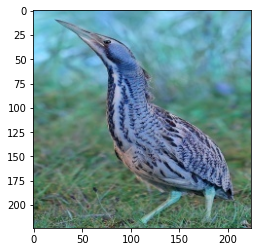

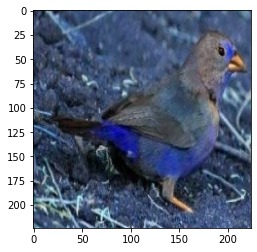

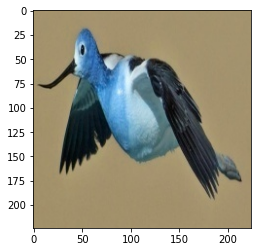

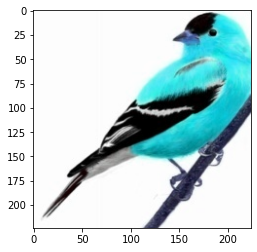

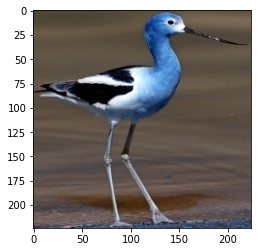

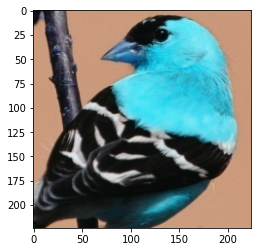

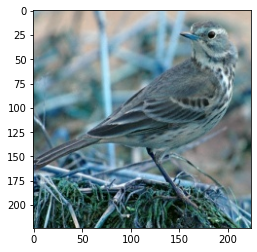

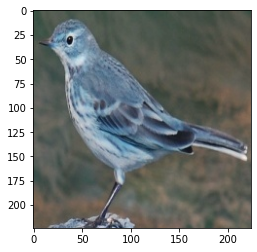

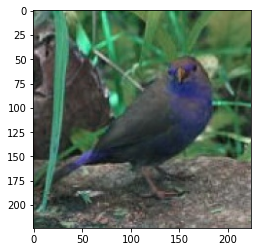

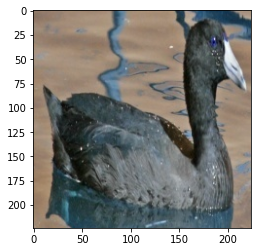

<Figure size 432x288 with 0 Axes>

In [8]:
from random import choice
for i in range(10):
    plt.imshow(choice(train_data))
    plt.figure()

In [9]:
def show_examples(imgs, labels):
    plt.figure(figsize=(20, 20))
    j = 0
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.title(labels[j])
        plt.imshow(imgs[j])
        j += 50
    plt.show()

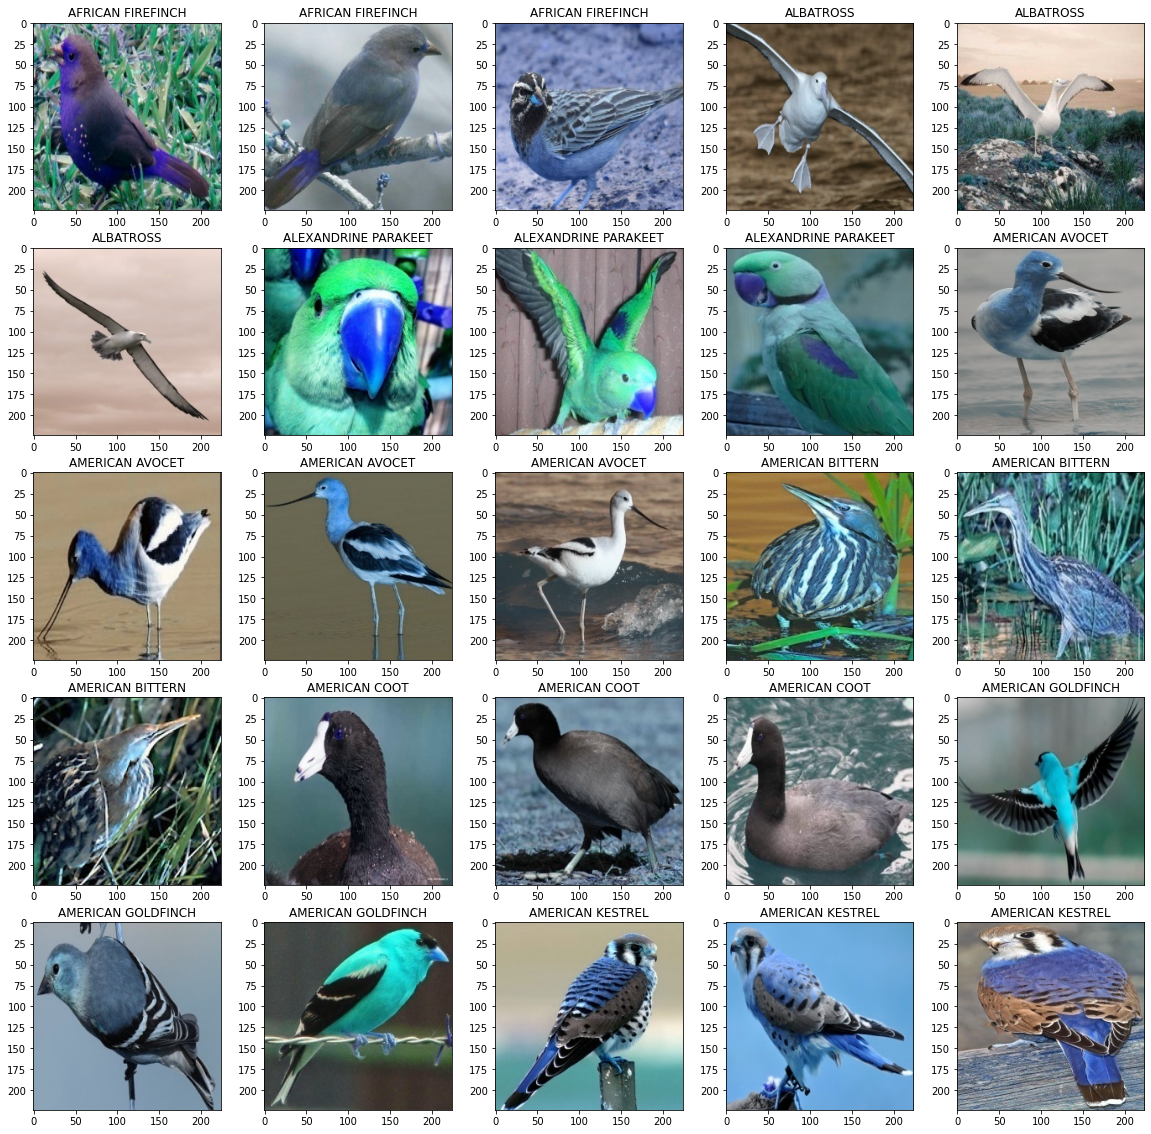

In [10]:
show_examples(train_data, train_labels)

Get tSNE embeddings

In [11]:
TSNE_TRAIN_SHAPE = (40, 40)
ENCODER_TRAIN_SHAPE = (120, 120)

In [12]:
from sklearn.model_selection import train_test_split

def train_embeddings(data):
    return TSNE(verbose=1, n_components=3).fit_transform(data)


def get_tsne_train_data(imgs, labels):
    resized = np.array([cv2.resize(im, TSNE_TRAIN_SHAPE) for im in imgs])
    X_Data, _, X_labels, _ = train_test_split(resized, labels, test_size=0.2, stratify=labels)
    return X_Data.flatten().reshape(X_Data.shape[0], TSNE_TRAIN_SHAPE[0] * TSNE_TRAIN_SHAPE[1] * 3), X_labels


In [16]:
tsne_train_data, tsne_train_labels = get_tsne_train_data(train_data, train_labels)

In [17]:
tsne_train_data.shape

(1220, 4800)

In [18]:
tsne_embeddings = train_embeddings(tsne_train_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1220 samples in 0.332s...
[t-SNE] Computed neighbors for 1220 samples in 15.811s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1220
[t-SNE] Computed conditional probabilities for sample 1220 / 1220
[t-SNE] Mean sigma: 958.172773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 141.118698
[t-SNE] KL divergence after 1000 iterations: 3.242716


Show 2d image distribution

In [19]:
def plot2d(tsne, labels):
    num = len(labels)
    palette = sb.color_palette("bright", np.unique(labels[:num]).shape[0])
    plot = sb.scatterplot(tsne[:, 0], tsne[:, 1], hue=labels[:num], legend='full', palette=palette).set_title(
        "Distribution")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
def plot3d(tsne, train_labels):
    num = len(train_labels)
    fig = px.scatter_3d(x=tsne[::, 0],
                        y=tsne[::, 1],
                        z=tsne[::, 2],
                        color=[str(label) for label in train_labels[:num]],
                        opacity=0.7)
    fig.show()


/home/redmoon/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


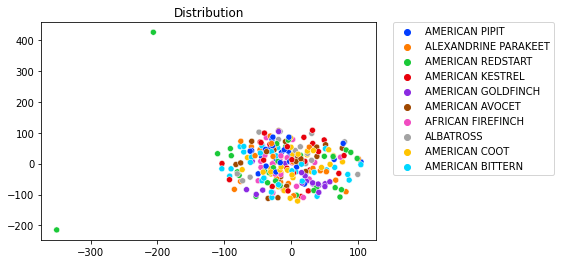

In [20]:
each = 5
plot2d(tsne_embeddings[::each], tsne_train_labels[::each]) 

Show 3d image distribution

In [21]:
plot3d(tsne_embeddings[::each], tsne_train_labels[::each])

Autoencoder class

In [22]:
import time
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.nn import Parameter
import torch.nn.functional as F

In [23]:
class AutoEncoder(nn.Module):
  
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
                            nn.Conv2d(1,16,3,padding=1), 
                            nn.ReLU(),
                            nn.BatchNorm2d(16),
                            nn.MaxPool2d(2), 

                            nn.Conv2d(16,8,3,padding=1),

                            nn.ReLU(),
                            nn.BatchNorm2d(8),
                            nn.MaxPool2d(2),  


                            nn.Conv2d(8,4,3,padding=1), 

                            nn.ReLU(),
                            nn.BatchNorm2d(4),
                            nn.MaxPool2d(2)  
                            )
        
        self.decoder = nn.Sequential(
                        nn.ConvTranspose2d(4,8,3,2,1,1),

                        nn.ReLU(),
                        nn.BatchNorm2d(8),

                        nn.ConvTranspose2d(8,16,3,2,1,1),

                        nn.ReLU(),
                        nn.BatchNorm2d(16),

                        nn.ConvTranspose2d(16,1,3,2,1,1),

                        nn.ReLU())

        
        self.model = nn.Sequential(self.encoder, self.decoder)
  
    def encode(self, x):
        return self.encoder(x)

    def forward(self, x):
        x = self.model(x)
        return x


In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Model description

In [34]:
from torchsummary import summary
model = AutoEncoder()
model.to(device)
summary(model, (1, 120, 120))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 120, 120]             160
            Conv2d-2         [-1, 16, 120, 120]             160
              ReLU-3         [-1, 16, 120, 120]               0
              ReLU-4         [-1, 16, 120, 120]               0
       BatchNorm2d-5         [-1, 16, 120, 120]              32
       BatchNorm2d-6         [-1, 16, 120, 120]              32
         MaxPool2d-7           [-1, 16, 60, 60]               0
         MaxPool2d-8           [-1, 16, 60, 60]               0
            Conv2d-9            [-1, 8, 60, 60]           1,160
           Conv2d-10            [-1, 8, 60, 60]           1,160
             ReLU-11            [-1, 8, 60, 60]               0
             ReLU-12            [-1, 8, 60, 60]               0
      BatchNorm2d-13            [-1, 8, 60, 60]              16
      BatchNorm2d-14            [-1, 8,

6400 -> 400

In [35]:
from torchsummary import summary
model = AutoEncoder()
model.to(device)
summary(model.encoder, (1, 120, 120))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 120, 120]             160
              ReLU-2         [-1, 16, 120, 120]               0
       BatchNorm2d-3         [-1, 16, 120, 120]              32
         MaxPool2d-4           [-1, 16, 60, 60]               0
            Conv2d-5            [-1, 8, 60, 60]           1,160
              ReLU-6            [-1, 8, 60, 60]               0
       BatchNorm2d-7            [-1, 8, 60, 60]              16
         MaxPool2d-8            [-1, 8, 30, 30]               0
            Conv2d-9            [-1, 4, 30, 30]             292
             ReLU-10            [-1, 4, 30, 30]               0
      BatchNorm2d-11            [-1, 4, 30, 30]               8
        MaxPool2d-12            [-1, 4, 15, 15]               0
Total params: 1,668
Trainable params: 1,668
Non-trainable params: 0
-----------------------------------

Preprocess data

In [36]:
encoded_labels = np.array([encoder[label] for label in train_labels])

In [37]:
resized = np.array([cv2.cvtColor(cv2.resize(im, ENCODER_TRAIN_SHAPE), cv2.COLOR_BGR2GRAY) for im in train_data])
# resized = np.array([cv2.resize(im, ENCODER_TRAIN_SHAPE) for im in train_data])
model_train_data, model_test_data, model_train_labels, model_test_labels = train_test_split(resized, encoded_labels, test_size=0.15, stratify=encoded_labels)

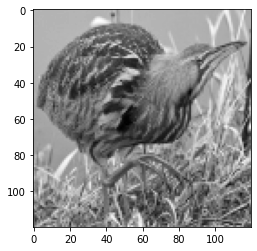

In [38]:
plt.imshow(model_train_data[1], cmap='gray')

Get train data

In [39]:
def load_data(data, labels):
	x_train, y_train = torch.from_numpy(data/255) , torch.from_numpy(labels)
	return x_train, y_train

model_train_data, model_train_labels = load_data(model_train_data, model_train_labels)

In [40]:
print(f"Train data shape {model_train_data.shape}\nTest  data shape {model_test_data.shape}")

Train data shape torch.Size([1297, 120, 120])
Test  data shape (229, 120, 120)


Train

In [41]:
best_autoencoder = None
best_score = 999

def add_noise(img):
	noise = torch.randn(img.size()) * 0.2
	noisy_img = img + noise.to(device)
	return noisy_img

def save_checkpoint(state, filename, is_best):
    """Save checkpoint if a new best is achieved"""
    if is_best:
        print("=> Saving new checkpoint")
        torch.save(state, filename)
    else:
        print("=> Validation Accuracy did not improve")
        
def pretrain(x_train, y_train, x_test, y_test, metric = None,  **kwargs):

    model = kwargs['model']
    num_epochs = kwargs['num_epochs']	
    start_epoch = 0 #checkpoint['epoch']
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
    
    # ======= train loader
    train_data = []
    for i in range(len(x_train)):
        train_data.append([x_train[i], y_train[i]])
    train_loader = DataLoader(dataset=train_data)
    # =====


    for epoch in range(start_epoch, num_epochs):
        full = 0

        for data, lables in train_loader:
            
            dd = data.float().reshape([1, ENCODER_TRAIN_SHAPE[0], ENCODER_TRAIN_SHAPE[1]]).unsqueeze(0)
            output = model(dd)    
            loss = nn.MSELoss()(output, dd) 
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            full += loss.item()
    
        full = full / len(train_loader)
        print("Epoch ",epoch,", error - ",full)
        
    return model
        

In [42]:
model = AutoEncoder().to(device)
model = pretrain(model_train_data, model_train_labels, [], [], model=model, num_epochs=50)

Epoch  0 , error -  0.03665637028164467
Epoch  1 , error -  0.0221952080501153
Epoch  2 , error -  0.01942403965382625
Epoch  3 , error -  0.017329455422791858
Epoch  4 , error -  0.01648242251786677
Epoch  5 , error -  0.015716251594954406
Epoch  6 , error -  0.015297633988363417
Epoch  7 , error -  0.01581457712286875
Epoch  8 , error -  0.015082165801721002
Epoch  9 , error -  0.014057241098556033
Epoch  10 , error -  0.013474438126746827
Epoch  11 , error -  0.013292302294586172
Epoch  12 , error -  0.012893418236452521
Epoch  13 , error -  0.012575910342483851
Epoch  14 , error -  0.012458121708329299
Epoch  15 , error -  0.012608470485503329
Epoch  16 , error -  0.012155504643043925
Epoch  17 , error -  0.01195175815700376
Epoch  18 , error -  0.011786781282845594
Epoch  19 , error -  0.011851421886237888
Epoch  20 , error -  0.01148839610838457
Epoch  21 , error -  0.01235414927634328
Epoch  22 , error -  0.011736768148494805
Epoch  23 , error -  0.011329032837592049
Epoch  24 ,

KeyboardInterrupt: 

Get test data and show embedded image

In [43]:
model_test_data, model_test_labels = load_data(model_test_data, model_test_labels)

In [44]:
def get_embedded_image(image):
    dd = image.float().reshape([1, ENCODER_TRAIN_SHAPE[0], ENCODER_TRAIN_SHAPE[1]]).unsqueeze(0)
    output = model(dd)[0].reshape([ENCODER_TRAIN_SHAPE[0], ENCODER_TRAIN_SHAPE[1], 1]).detach().numpy()
    return output

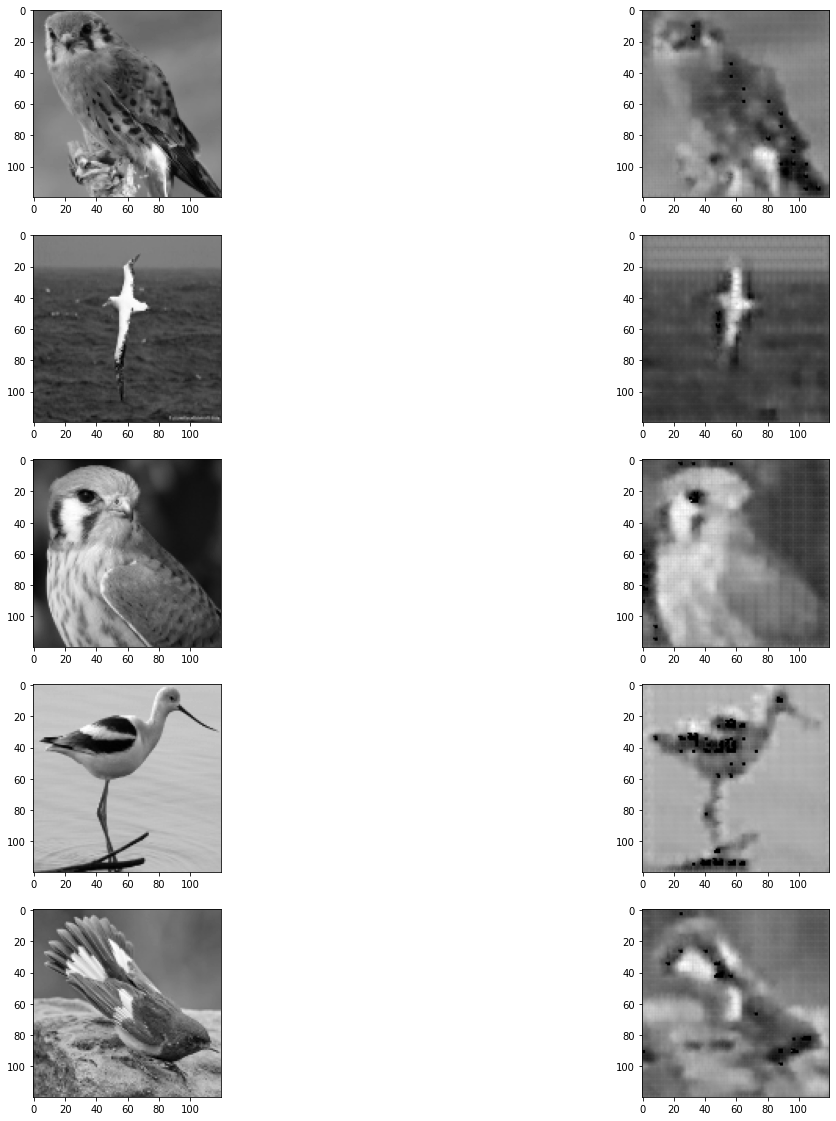

In [46]:
from random import choice
plt.figure(figsize=(20, 20))
j = 0
for i in range(5):
    plt.subplot(5, 2, j + 1)
    rand = choice(model_test_data)
    plt.imshow(rand, cmap='gray')
    
    plt.subplot(5, 2, j + 2)
    plt.imshow(get_embedded_image(rand), cmap='gray')
    j += 2
    

In [59]:
all_data = model_test_data.float().reshape([model_test_data.shape[0], 1, ENCODER_TRAIN_SHAPE[0], ENCODER_TRAIN_SHAPE[1]])
all_outs = model(all_data).reshape([all_data.shape[0], ENCODER_TRAIN_SHAPE[0] * ENCODER_TRAIN_SHAPE[1]]).detach().numpy()
all_outs.shape

(229, 14400)

In [60]:
embedded = train_embeddings(all_outs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 229 samples in 0.087s...
[t-SNE] Computed neighbors for 229 samples in 1.055s...
[t-SNE] Computed conditional probabilities for sample 229 / 229
[t-SNE] Mean sigma: 6.397162
[t-SNE] KL divergence after 250 iterations with early exaggeration: 159.345520
[t-SNE] KL divergence after 1000 iterations: 2.520268


In [61]:
model_test_labels

tensor([4, 1, 7, 8, 3, 1, 0, 3, 8, 8, 4, 1, 7, 9, 6, 7, 1, 3, 2, 2, 8, 6, 7, 7,
        6, 3, 1, 3, 1, 9, 5, 8, 5, 2, 9, 5, 1, 2, 4, 2, 6, 4, 9, 5, 6, 4, 3, 6,
        9, 2, 1, 3, 6, 0, 0, 4, 5, 8, 0, 1, 9, 1, 8, 3, 4, 6, 9, 6, 6, 9, 3, 4,
        9, 7, 5, 5, 7, 5, 2, 4, 3, 6, 7, 0, 0, 5, 7, 5, 7, 6, 2, 5, 6, 3, 9, 4,
        4, 9, 9, 6, 9, 0, 5, 2, 7, 7, 9, 1, 1, 0, 2, 1, 8, 1, 5, 7, 1, 7, 4, 5,
        8, 7, 0, 6, 1, 2, 8, 8, 3, 8, 6, 8, 3, 0, 8, 5, 5, 0, 3, 3, 1, 7, 6, 0,
        8, 1, 9, 8, 2, 5, 7, 9, 0, 1, 9, 3, 2, 0, 2, 3, 8, 8, 0, 6, 1, 9, 1, 1,
        3, 8, 8, 3, 0, 3, 6, 0, 3, 7, 2, 1, 4, 0, 1, 0, 2, 5, 2, 8, 4, 4, 9, 6,
        6, 4, 8, 3, 3, 1, 5, 6, 1, 6, 0, 0, 3, 4, 6, 7, 9, 3, 0, 5, 2, 8, 8, 0,
        6, 4, 2, 7, 3, 7, 2, 4, 1, 5, 0, 0, 3])

In [62]:
plot2d(embedded[::each], embedded[::each]) 

/home/redmoon/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Exception: Data must be 1-dimensional